# LDA (Latent Dirichlet Allocation) Topic Modeling Playground

As an unsupervised machine learning approach, topic modeling can help researchers reduce large datasets into a small number of meaningful topics. This dimensionality reduction is achieved by constructing clusters of words from a collection of documents through probabilistic modelling. Documents are represented as a distribution of "latent" topics, which in turn are represented as a distribution of "observed" words. LDA is a topic modeling technique that builds words per topic and topics per document across all of the documents for a pre-determined number of topics in the corpus. 

Below is the information about the project directory and how you can use this notebook. 

**Description**

This project direcotry contains a Jupyter Notebook that can be used as a tutorial to learn about how to conduct and evaluate LDA topic modeling, as well as to interpret and present the results. Some helpful readings to gain a deeper understanding of topic modeling are also included in the notebook. These can help you increase your general knowledge of topic modeling and learn different topic modeling approaches. The project directory includes the following:

- LDA topic modeling playground Jupyter notebook
- Sample data for topic extraction
- yaml file to set up a conda environment in your own space 

*`topic_modeling_playground_notebook.ipynb`*

This notebook shows a step-by-step workflow to conduct an LDA topic modeling, including steps to process raw data, run LDA topic modeling, and evaluate and visualize the results. The contents of the notebook are grouped into five parts:

- Data preparation (Steps 1 - 3)
- Model training (Step 4)
- Model evaluation (Steps 5 - 7)
- Visualization of results (Step 8)
- Identification of dominant topics (Step 9)
- Model improvement (Steps 10 - 11)

Once you launch the notebook, you can run the code in each cell and see the results in an interactive way. 

*`papers.csv`* 

This is a [a published COVID-19 paper dataset](https://www.kaggle.com/draaslan/covid19-research-papers-dataset?select=papers.csv) available on Kaggle that contains journal papers submitted to journals from May 2020 to May 2021. It was cleaned and used to demonstrate how topic modeling (LDA in particular here) can be conducted to possibly explore some themes in the abstracts of the papers in the dataset.

*`topic_modleing_env.yml`*

This is the conda environment file for a virtual environment which should contain all necessary packages to run the text. 
 
**How to Use the Notebook** 

The yaml file sets up the environment. To create your topic_modeling environment, run the following command in the root directory:

`conda env create -f topic_modeling_env.yml`
 
For more information on setting up your own conda environment, check out [this page](http://rcpedia.stanford.edu/topicGuides/sharedCondaEnv.html).

**Helpful Readings**

- [Latent Dirichlet Allocation](https://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
- [Intuitive Guide to Latent Dirichlet Allocation](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)
- [Topic Modeling and Latent Dirichlet Allocation (LDA) in Python](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2)
- [Reading Tea Leaves: How Humans Interpret Topic Models](http://papers.nips.cc/paper/3700-reading-tea-leaves-how-humans-interpret-topic-models.pdf)

**Note**: This is just one example workflow, feel free to explore the world of available tools/resources! 


## Step 1: Load your data

We are going to load the CoVID-19 dataset. Let's find out what researchers published related to COVID-19 this past year and how they can be classified using LDA topic modeling!

**Note**: Topic modeling generally doesn't work well with short text such as tweets nor with a small number of documents. Examine your data first to see if it is a good candidate for topic modeling.

In [322]:
## Read in documents and check the shape - this is a random sample of 10,000 documnetsfrom the full dataset

import pandas as pd

df = pd.read_csv('papers.csv')
df.shape

(10000, 10)

In [323]:
## Check the shape of the dataframe (number of rows and columns) and review the first five rows

print(f'\nThere are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.\n')

df.head()



There are 10000 rows and 10 columns in the dataset.



,Unnamed: 0,pmid,doi,journal,country,title,authors,abstract,citation_count,published_at
0,52154,32754901,10.1111/cod.13683,Contact dermatitis,England,Teledermatology and hygiene practices during the COVID-19 pandemic.,"Antonio Cristaudo, Flavia Pigliacelli, Alessia Pacifico, Giovanni Damiani, Paolo Iacovelli, Aldo...","<?xml version=""1.0""?>\n<p/>\n",3,2020-12-14 00:00:00
1,56074,33188602,10.1007/s00264-020-04646-2,International orthopaedics,Germany,The experience of contact tracing in Singapore in the control of COVID-19: highlighting the use ...,"Sean Han Sheng Lai, Camelia Qian Ying Tang, Asok Kurup, Gowreeson Thevendran","<Abstract>\n <AbstractText Label=""PURPOSE"">Containing the coronavirus disease 201...",2,2021-01-22 00:00:00
2,23757,32966612,10.1111/all.14596,Allergy,Denmark,Small droplet emission in exhaled breath during different breathing manoeuvres: Implications for...,"Neil J Greening, Per Larsson, Evert Ljungström, Salman Siddiqui, Anna-Carin Olin","<?xml version=""1.0""?>\n<p/>\n",0,2021-03-18 00:00:00
3,23853,32910458,10.1002/jmv.26505,Journal of medical virology,United States,Apoptosis and immunophenotyping of peripheral blood lymphocytes in Iranian COVID-19 patients: Cl...,"Saeid Taghiloo, Masoud Aliyali, Siavash Abedi, Hossein Mehravaran, Ali Sharifpour, Ehsan Zaboli,...","<Abstract>\n <AbstractText>A novel member of human coronavirus, named severe acut...",5,2021-03-10 00:00:00
4,98592,32514598,10.1007/s00134-020-06092-5,Intensive care medicine,United States,Managing ICU surge during the COVID-19 crisis: rapid guidelines.,"Shadman Aziz, Yaseen M Arabi, Waleed Alhazzani, Laura Evans, Giuseppe Citerio, Katherine Fischko...","<Abstract>\n <AbstractText>Given the rapidly changing nature of COVID-19, clinici...",58,2020-12-18 00:00:00


## Step 2: Examine and clean data

We will look at the distribution of journals and countries. You should look at other columns as well to understand the data better. Then, we will examine the text in the abstract column to see if it needs to be cleaned. Understanding your data is an extremely important part of any research. As we are all aware, "Garbage in and garbage out!"

In [324]:
## Check the distribution of countries - US and England comprise the vast majority of papers

print(f'\nThere are a total of {df.country.nunique()} unique countries in which papers were published in the dataset.\n')

pd.DataFrame(df.country.value_counts().reset_index().values, columns = ['country', 'doc_counts'])



There are a total of 63 unique countries in which papers were published in the dataset.



,country,doc_counts
0,United States,3395
1,England,2527
2,Switzerland,767
3,Netherlands,722
4,Germany,371
...,...,...
58,Serbia,1
59,British Virgin Islands,1
60,Slovenia,1
61,Finland,1


In [325]:
## Check the distribution of journals - Top 5 journals comprise 3/4 of the journal submissions

pd.set_option('display.max_colwidth', 100) # increase maximum width of a column

print(f'\nThere are a total of {df.journal.nunique()} unique journals in the dataset.\n')

pd.DataFrame(df.journal.value_counts().reset_index().values, columns = ['journal', 'doc_counts'])



There are a total of 2974 unique journals in the dataset.



,journal,doc_counts
0,BMJ (Clinical research ed.),130
1,PloS one,122
2,International journal of environmental research and public health,100
3,Journal of medical virology,82
4,Cureus,65
...,...,...
2969,Seminars in oncology,1
2970,Assay and drug development technologies,1
2971,Journal of separation science,1
2972,Journal of medical biochemistry,1


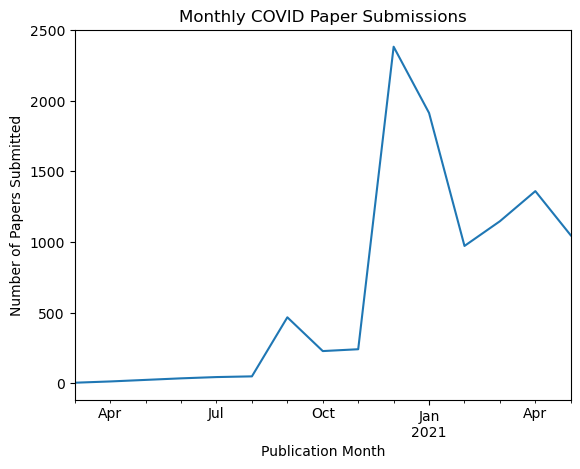

In [326]:
## Plot the number of monthly paper submissions in the time period - Submissions peaked in December

import matplotlib.pyplot as plt

# Convert the published date to datetime and plot a line graph
df['published_at'] = pd.to_datetime(df['published_at'])

df.groupby(df['published_at'].dt.to_period('M'))['journal'].count().\
    plot(kind = 'line', xlabel = 'Publication Month', ylabel = 'Number of Papers Submitted', title = 'Monthly COVID Paper Submissions');


In [327]:
## Check the abstract text of the first document

df.abstract[0]


'<?xml version="1.0"?>\n<p/>\n'

Note that the raw abstract data contains a lot of xml tags and other artifacts such as unicode characters and extra spaces that need to be cleaned. 
We will not attempt to clean the data completely, but will:
- remove all xml tags
- remove newline characters with trailing spaces
- clean up unicode characters

In [328]:
## Check if there are null values in the abstract column

df[df.abstract.isnull() == True]

,Unnamed: 0,pmid,doi,journal,country,title,authors,abstract,citation_count,published_at
447,116619,32291351,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
600,68545,33023941,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
751,107334,32461490,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
786,70092,33017905,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
953,37154,33468987,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
985,111446,32425338,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1243,21304,33590936,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1252,117511,32527346,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1697,93486,32702051,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1898,27053,33596235,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT


In [329]:
## Remove xml from text

from bs4 import BeautifulSoup

def remove_xml(abstract):
    
    """
    
    This function removes xml tags from text.
    
    Input:
    abstract - abstract text from each paper in df
    
    Output:
    abstract_cleaned - abstract text free of xml tags and trailing spaces
    
    """
        
    # Create a soup object of the abstract tet
    soup = BeautifulSoup(abstract, 'lxml')
    
    # Find the tags that have the word 'abstract' and parse the text
    text = soup.find_all('abstract')
    
    # Create a list of the parsed abstract text and remove the newline character
    abstracts = []
    for i in text:
        text = i.get_text().replace('\n', ' ')
        abstracts.append(text)
    
    # Remove the list
    abstract_cleaned = ''.join(abstracts)
    
    return abstract_cleaned
    

In [330]:
## Clean the data

import html

def clean_data(df):
    
    """
    
    This function cleans the raw data.
    
    Input:
    df - raw data read into a pandas df
    
    Output:
    df - dataframe free of html tags, non-ASCII characters, trailing spaces, and rows with no abstract text
    
    """
    
    # Drop the rows with null values in the abstract column
    df.dropna(subset=['abstract'], inplace = True)
    
    # Remove xml tags with training spaces and eplace all non-ASCII with space
    df['abstract'] = df['abstract'].apply(lambda x: ''.join([i if ord(i) < 128 else ' ' for i in html.unescape(remove_xml(x).strip())]))

    # Drop the rows if the abstract doesn't esist
    df = df[(df.abstract != 'No Abstract.') & (df.abstract != '')]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df


In [331]:
## Clean the data and check the abstract text of the first document again. Check other documents too.

df = clean_data(df)

df['abstract'][1000]

"A pandemic of coronavirus disease 2019 (COVID-19) emerged and affected most of the world in early 2020. To inform effective public health measures we conducted a knowledge, attitude and practice (KAP) survey among a Hausa Muslim society in Nigeria in March 2020. The study is an analytic cross-sectional survey with questionnaires administered to the general population including Health Care Workers (HCW) in Kano, Nigeria. Participants were recruited by convenience sampling following informed consent. The percentage of KAP scores were categorized as good and poor. Independent predictors of good knowledge of COVID 19 were ascertained using a binary logistic regression model. The questionnaire was administered among urban 32.8%, peri-urban dwellers 32.4%, and to online participants 34.8%. The peri-urban and urban participants were given paper questionnaires. There were 886 study participants with mean age 28.58yrs [SD:10.25] (Interquartile range [IQR]:22yrs-32yrs), males 55.4% with 57.3% h

In [332]:
## Check the shape of the dataframe again - 28,410 records were removed

df.shape


(6809, 10)

In [333]:
## Create a corpus for topic modeing with a list of abstracts 

doc_texts = df['abstract'].to_list()


## Step 3: Preprocess your documents

We will perform the following steps to preprocess data:

* **Tokenization** - Text is split into sentences and the sentences into words (lowercased).
* **Punctuation removal** - Puncutations are removed.
* **stopwords removal** - English stopwords are removed.
* **Lemmatization** - Words reduced to its root form (e.g., verbs in past and future tenses are changed into present).
* **Short words removal** - Words that are less than 3 characters are removed.

We've found that removing stopwords is the most beneficial preprocessing step when running topic modeling. Be sure to take a look at the stopword list you use and make sure it makes sense for your corpus! The NLTK Stopword list we are using is all lowercase, so that will also be part of our pre-processing. You can also customize the stopwords list by adding words that are common in your corpus.

Additionally, we only performed lemmatization here because this approach takes into account the morphological analysis of words. Stemming has some limitations and can result in errors due to overstripping or understripping the words. You should try different preprocessing methods to find the best ones for your data. For more information on data preprocessing methods, check out [this tutorial](https://www.tutorialspoint.com/natural_language_toolkit/index.htm).

In [334]:
## Import nltk libraries to preprocess corpus text

import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string


[nltk_data] Downloading package stopwords to /Users/wolee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wolee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [335]:
## Remove punctuations and stopwords and normalize words

def preprocess_docs(text, stop):
        
    """
    
    This function preporcesses document text in prepartion for model training.
    
    Input:
    text - cleaned document text in a list 
    stop - nltk English stopwords
    
    Output:
    text_normalized - normalized text with punctuation and, stopwords removed
    
    """
        
    punct = set(string.punctuation)
    lemma = WordNetLemmatizer()
    
    # Remove puntuations
    punct_clean = ''.join([w for w in text if w not in punct])
    
    # Remove stopwords
    stop_clean = ' '.join([w for w in punct_clean.lower().split() if w not in stop and len(w) > 2])
    
    # Lemmatize words
    text_normalized = ' '.join(lemma.lemmatize(w) for w in stop_clean.split())
    
    return text_normalized


In [336]:
## Take a look at the first 10 stop words

stopword_list = stopwords.words('english')
stopword_list[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [337]:
## Process documents and check the first 10 words of the first documnet

processed_docs = [preprocess_docs(text, stopword_list).split() for text in doc_texts]
processed_docs[0][0:10]


['containing',
 'coronavirus',
 'disease',
 '2019',
 'covid19',
 'pandemic',
 'would',
 'require',
 'aggressive',
 'contact']

In [338]:
## Create a dictionary from 'processed_docs' containing the number of times a word appears in the training set 

import gensim
from gensim.corpora import Dictionary

corpus_dictionary = gensim.corpora.Dictionary(processed_docs)

# Check the dictionary

count = 0
for k, v in corpus_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
        

0 2019
1 achieve
2 activity
3 adopts
4 agency
5 aggressive
6 also
7 analysed
8 anonymised
9 application
10 approach
11 article
12 ascertain
13 backward
14 bluetooth
15 case
16 citystate
17 close
18 closed
19 cloudbased
20 cluster


You can also filter out very rare or common words from your dictionary (choose your thresholds).
For example, remove tokens that appear in

* `no_below` (int, optional) – Keep words which are contained in at least `no_below` documents (number).
* `no_above` (float, optional) – Keep words which are contained in no more than `no_above` documents (percentage - fraction of total corpus size, not an absolute number).
* `keep_n` (int, optional) – Keep only the first `keep_n` most frequent tokens (number).

In [339]:
## Filter out words with the parameters mentioned above and check the dictionary again

corpus_dictionary.filter_extremes(no_below = 15, no_above = 0.6, keep_n = 10000)

count = 0
for k, v in corpus_dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 20:
        break
        

0 2019
1 achieve
2 activity
3 agency
4 aggressive
5 also
6 analysed
7 application
8 approach
9 article
10 ascertain
11 case
12 close
13 closed
14 cluster
15 complement
16 confirmed
17 connection
18 contact
19 containing
20 continue


In [340]:
## Convert list of documents (corpus) into a Document Term Matrix using the dictionary - Bag-of-words model for each document
# The dictionary shows how many words are in it and how many times those words appear

bow_corpus = [corpus_dictionary.doc2bow(doc) for doc in processed_docs]


In [341]:
## Check the Bag of Words corpus for the sample document - (token_id, token_count)

sample_doc_num = 7
bow_doc = bow_corpus[sample_doc_num]

sample_doc = df['abstract'].iloc[sample_doc_num]

print(f'\nAbstract for the sample document:\n\n {sample_doc}\n')

for i in range(len(bow_doc)):
    print(f'Word {bow_doc[i][0]} {corpus_dictionary[bow_doc[i][0]]} appears {bow_doc[i][1]} time.') 
    


Abstract for the sample document:

 On December 1, 2020, Drs. Wolfgang Wodarg and Micheal Yeadon petitioned to withhold emergency use authorization of the BNT162b2 messenger ribonucleic acid vaccine for coronavirus disease 2019 (COVID-19) manufactured by BioNTech and Pfizer, raising concern for female infertility risks but acknowledging the lack of evidence. The European Medicines Agency and the US Food and Drug Administration ultimately issued emergency use authorizations, but misinformation claiming that COVID-19 vaccines cause female infertility began circulating on social media, potentially influencing public perception and medical decision making among pregnant patients or those seeking to become pregnant. To determine the potential influence misinformation may have had on public interest in infertility related topics, as analyzed through internet search statistics in the US. The Google Trends tool was used to analyze results for the search terms "infertility," "infertility AND v

## Step 4: Build your topic models

You will have to train many models to compare how the different hyperparameters change the topics. In this example, we are changing the number of topics and also modifying multiple model hyperparameters, such as:

* **corpus** - Stream of document vectors or sparse matrix of shape (num_documents, num_terms) 
* **num_topics** - The number of requested latent topics to be extracted from the training corpus
* **id2word** - Mapping from word IDs to words
* **alpha** - Can set prior selecting strategies such as 'symmetric,' 'asymmetric', or 'auto' (optional)   
* **passes** - Number of passes through the corpus during training (optional)
* **random_state** - Either a randomState object or a seed to generate one (optional, useful for reproducibility)

For information on `gensim` hyperparameters for the LDA model, check out [this page](https://radimrehurek.com/gensim/models/ldamodel.html).

**Note**: When you have a large dataset and/or a large number of topics to test, it can take a long time to train the models. Certain parameters such as `eval_every` can also slow down the training process quite a bit. You may consider using the [ldamulticore function in gensim](https://radimrehurek.com/gensim/models/ldamulticore.html) to speed up the model traning. Please always be mindful of using resources if you are using shared computing systems such as the Yens!

In [342]:
## Import gensim, tqdm, numpy, and time libraries to run LDA models, compute coherence scores, and check the training progress

from gensim.models import CoherenceModel, ldamodel
from tqdm.auto import tqdm
import numpy as np
import time


In [343]:
## Run LDA models for different number of topics and calculate topic coherence scores

start_time = time.time()

# Select a range of topic numbers to test for LDA models
start_n, stop_n, interval_n = 5, 55, 5
topic_nums = np.arange(start_n, stop_n, interval_n).tolist()
topic_range = tqdm(topic_nums)

coherences = []
models = {}

for topic_num in topic_range:
    # Progress bar
    topic_range.set_description(f'Processing topic number {topic_num}')
    
    # Create a dictionary and filter texts
    dictionary = Dictionary(processed_docs)
    dictionary.filter_extremes(
        no_below = 15,
        no_above = 0.60,
        keep_n = 10000
    )
    
    # Create a corpus and run LDA models
    corpus = [dictionary.doc2bow(text) for text in processed_docs]
    lda_model = ldamodel.LdaModel(
        corpus = corpus,
        num_topics = topic_num,
        id2word = dictionary,
        random_state = 42,
        alpha = 'auto', 
        passes = 4       
    )
    
    # Compute coherence scores for LDA models
    cm = CoherenceModel(
        model = lda_model,
        texts = processed_docs,
        dictionary = dictionary,
        coherence = 'c_v'
    )
    coherences.append([topic_num, cm.get_coherence()])
    models[topic_num] = lda_model

time.sleep(1)

elapsed_time = (time.time() - start_time)/60

print(f'Finished building topic models! It took {elapsed_time:.2f} minutes.\n')

  0%|          | 0/10 [00:00<?, ?it/s]

Finished building topic models! It took 3.31 minutes.



In [344]:
## Save the intermediary results 

# import pickle

# pickle.dump(doc_texts, open('doc_texts.pk', 'wb'))
# pickle.dump(dictionary, open('dictionary.pk', 'wb'))
# pickle.dump(corpus, open('corpus.pk', 'wb'))
# pickle.dump(coherences, open('coherence_results.pk', 'wb'))
# pickle.dump(models, open('lda_models.pk', 'wb'))

# # To reload the saved results, use the below code

# doc_texts = pickle.load(open('doc_texts.pk', 'rb'))
# corpus = pickle.load(open('corpus.pk', 'rb'))
# dictionary = pickle.load(open('dictionary.pk', 'rb'))
# coherences = pickle.load(open('coherence_results.pk', 'rb'))
# models = pickle.load(open('lda_models.pk', 'rb'))


## Step 5: Evaluate your models 

Topic Coherence measures provide a metric to assess the quality of extracted topics and can aid in choosing the optimal number of topics. Ways to interprete the results can vary from meausre to measure. For example, for the c_v measure used here, the higher the score, the better the topics are extracted. However, for the c_umass measure, the closer scores are to zero, the better. In general, you're looking for an "elbow" in your coherence plot; this occurs when an increasing number of topics fails to improve the coherence score significantly. Below is a description of different coherence measures:

* **C_v** - Based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
* **C_p** - Based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
* **C_uci** - Based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
* **C_umass** - Based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
* **C_npmi** - An enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
* **C_a** - Based on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity

For more information on model evaluation and hyperparameter tuning, take a look at [this Medium article](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0). 

In [345]:
## Import matplotlib and seaborn libraries for plotting results

import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
## Convert the results to a dataframe

df_coherence = pd.DataFrame(coherences)
df_coherence.columns = ['topic_num','coherence']


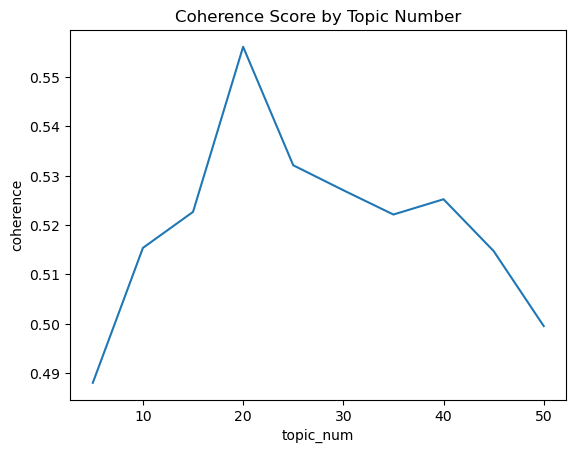

In [347]:
## Plot the coherence graph  

sns.lineplot(x = df_coherence['topic_num'], y = df_coherence['coherence']).set_title('Coherence Score by Topic Number');


In the above graph, the coherence score is the highest when the number of topics is 25. You need to find an elbow (the point where the slope of the curve is leveling off) if there is a large range of topic numvers. Since the difference in coherence score between 20 and 25 is small, we will examine the 20 and 25 topic models in more detail. Selecting an optimal number of topics for your data can be tricky. In addition to comparing coherence scores across different LDA models, it is likely that you will need to use your domain knowledge to decide on the number of topics. There is no hard science here. Several factors such as the theoretical knowledge of the corpus, data size, and computational cost can often be considered as well in the decision-making process. 

Looking at the actual topics should be the final method to decide which topic model to go with. It is important to understand that topic modeling is not an objective approach that classifies documents against ground truth; rather, it is a tool to help us read and reduce the data. Below shows what words are occuring in each of the 20 and 30 topics, respectively. See which set of topics appear to classify sample documents better.

**Note**: You may notice that the results may slightly vary even if you train the models using the same corpus and keep the values of the model hiyperparmeters the same. This is due to the probablisitc nature of the LDA mdeling. Adding the random state and increasing the numbe of iterations help the models converge and become more stable. Coherence scores will change depneding on the range of topic numbers. 

## Step 6: Classify the topics - inferring topics from words

Once you decide on the number of topics, you can now try to assign a "label" to each extracted topic. Some topics are harder to label than others. For example, in the 30-topic model, Topic 29 is clearly about "COVID-19 vaccines" while Topic 5 can be labeled as "online education."

In [348]:
## Get topics for the trained model

def get_model_topics(lda_models, num_topics):
        
    """
    
    This function prints out the extracted topics and topic words of the trained model
    given the number of topics in the model. 
    
    Input:
    lda_models - Trained LDA models
    num_topics - Number of topics 
    
    Output:
    topics and topic words along with their probabilities
    
    """

    # Print topic number and associated words with probabilities 
    for topic_num, topic in models[num_topics].print_topics(-1):
        print(f'Topic {topic_num + 1}: \nWords: {topic} \n')
    

In [349]:
## Topic words for the 20-topic model

num_topics = 20

get_model_topics(models, num_topics)

Topic 1: 
Words: 0.028*"case" + 0.016*"model" + 0.015*"country" + 0.014*"number" + 0.013*"2020" + 0.012*"death" + 0.012*"data" + 0.010*"epidemic" + 0.010*"rate" + 0.010*"transmission" 

Topic 2: 
Words: 0.016*"lockdown" + 0.015*"pandemic" + 0.011*"social" + 0.010*"2020" + 0.010*"health" + 0.009*"study" + 0.009*"people" + 0.008*"effect" + 0.008*"change" + 0.008*"measure" 

Topic 3: 
Words: 0.044*"patient" + 0.019*"chest" + 0.013*"clinical" + 0.011*"pneumonia" + 0.011*"lung" + 0.011*"finding" + 0.010*"study" + 0.009*"imaging" + 0.009*"score" + 0.007*"value" 

Topic 4: 
Words: 0.028*"vaccine" + 0.021*"drug" + 0.020*"treatment" + 0.014*"clinical" + 0.013*"coronavirus" + 0.012*"therapy" + 0.012*"sarscov2" + 0.011*"trial" + 0.011*"therapeutic" + 0.010*"disease" 

Topic 5: 
Words: 0.022*"student" + 0.021*"health" + 0.015*"study" + 0.014*"participant" + 0.014*"online" + 0.012*"social" + 0.012*"survey" + 0.012*"knowledge" + 0.011*"information" + 0.011*"pandemic" 

Topic 6: 
Words: 0.028*"sarsco

In [350]:
## Topic words for the 25-topic model

num_topics = 25

get_model_topics(models, num_topics)

Topic 1: 
Words: 0.033*"case" + 0.017*"2020" + 0.016*"number" + 0.015*"country" + 0.013*"death" + 0.012*"epidemic" + 0.011*"outbreak" + 0.010*"rate" + 0.010*"china" + 0.009*"data" 

Topic 2: 
Words: 0.022*"lockdown" + 0.013*"effect" + 0.012*"activity" + 0.012*"change" + 0.010*"physical" + 0.010*"pandemic" + 0.010*"2020" + 0.009*"study" + 0.009*"impact" + 0.008*"increase" 

Topic 3: 
Words: 0.047*"patient" + 0.021*"symptom" + 0.019*"chest" + 0.017*"case" + 0.015*"clinical" + 0.012*"finding" + 0.012*"pneumonia" + 0.012*"fever" + 0.011*"lung" + 0.009*"study" 

Topic 4: 
Words: 0.026*"vaccine" + 0.018*"trial" + 0.018*"drug" + 0.016*"treatment" + 0.016*"clinical" + 0.012*"coronavirus" + 0.011*"disease" + 0.010*"therapeutic" + 0.010*"review" + 0.010*"therapy" 

Topic 5: 
Words: 0.030*"student" + 0.020*"participant" + 0.019*"study" + 0.019*"online" + 0.017*"survey" + 0.017*"knowledge" + 0.014*"information" + 0.012*"pandemic" + 0.012*"practice" + 0.011*"attitude" 

Topic 6: 
Words: 0.035*"sars

## Step 7: Testing your model on sample documents for validation

Test different models on sample documents and compare the results by evaluating the generated topics.

In [351]:
## Get document topics

def get_doc_topics(df, doc_num, lda_models, num_topics, dictionary, stopwords):
    
    """
    
    This function preporcesses document text (abstract), 
    extract topics and topic words for the document using the trained topic model, and
    prints out the text, topics, and topic words.
    
    Input:
    df - dataframe of documents
    lda_models - Trained LDA models
    num_topics - Number of topics 
    dictionary - dictionary
    doc_num - index number of the document in the df
    
    Output:
    abstract text
    topics and their probabilities 
    topic words and their probabilities (limited to 5 words for each topic)
    
    """

    
    # Get the abstrat of the document and print it
    doc = df['abstract'].iloc[doc_num]
    print(f'\nAbstract for the sample document:\n\n {doc}\n')

    # preprocess the document
    bow_vector = dictionary.doc2bow(preprocess_docs(doc, stopword_list).split())
    
    # Sort the topic, probability list and print topics and corresponding words
    for topic_num, topic_prob in sorted(models[num_topics][bow_vector], key = lambda item: -1*item[1]):
        print(f'Probability: {round(float(topic_prob), 6)}\t  Topic {topic_num + 1}: {models[num_topics].print_topic(topic_num, 5)}')    


In [364]:
## Check the random document and its topics

num_topics = 20
test_doc_num = 2512

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 During the current COVID-19 infectious disease pandemic, the demand for NIOSH-approved filtering facepiece respirators (FFR) has exceeded supplies and decontamination and reuse of FFRs has been implemented by various user groups. FFR decontamination and reuse is only intended to be implemented as a crisis capacity strategy. This paper provides a review of decontamination procedures in the published literature and calls attention to their benefits and limitations. In most cases, the data are limited to a few FFR models and a limited number of decontamination cycles. Institutions planning to implement a decontamination method must understand its limitations in terms of the degree of inactivation of the intended microorganisms and the treatment's effects on the fit and filtration of the device.

Probability: 0.544549	  Topic 9: 0.014*"pandemic" + 0.012*"disease" + 0.010*"health" + 0.007*"2020" + 0.007*"system"
Probability: 0.417871	  Topic 15: 0.021*"m

In [366]:
## Check the random document and its topics

num_topics = 25
test_doc_num = 2512

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 During the current COVID-19 infectious disease pandemic, the demand for NIOSH-approved filtering facepiece respirators (FFR) has exceeded supplies and decontamination and reuse of FFRs has been implemented by various user groups. FFR decontamination and reuse is only intended to be implemented as a crisis capacity strategy. This paper provides a review of decontamination procedures in the published literature and calls attention to their benefits and limitations. In most cases, the data are limited to a few FFR models and a limited number of decontamination cycles. Institutions planning to implement a decontamination method must understand its limitations in terms of the degree of inactivation of the intended microorganisms and the treatment's effects on the fit and filtration of the device.

Probability: 0.411972	  Topic 24: 0.020*"mask" + 0.020*"study" + 0.015*"sarscov2" + 0.011*"sample" + 0.010*"face"
Probability: 0.284415	  Topic 19: 0.026*"care

25 seems to be an optimal number of topics for this corpus because the model with 25 topics appear to capture the themes of the documents better than 20 topics. Pick different documents and see if the dominant topics for those documents make sense! In the next step, we will visualize the results.

## Step 8: Visualize the topics

### Examining topics with PyLDAVis

This PyLDAVis tool can help explore the topics generated by LDA models. 
* Each **circle** represents a topic. The larger the bubble, the higher percentage of the number of documents in the corpus is about that topic.
* **Distances** between circles represent the relatedness of the topics. We'd like to see the discrete topics with minimal overlaps.
* **Blue bars** represent the overall frequency of each word in the corpus.
* **Red bars** represent the frequency of a word belonging to a topic.
* For **both bars**, the longer the bar, the higher the frequency of a given word for a given topic.

For more information, visit [this page](https://pyldavis.readthedocs.io/en/latest/readme.html#usage)

In [372]:
## Display top 3 words for 25 topics with the highest weights - topics are sorted by their weights so the order of topics is different.

import importlib
import warnings
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
num_topics = 20
    
vis = pyLDAvis.gensim_models.prepare(models[num_topics], corpus, dictionary)
pyLDAvis.display(vis)

### Displaying top 10 words for each topic in WordCloud 

The WordCloud tool shows the size of the words proportional to the weight in each topic. For wordcloud object parameters, check out [this page](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

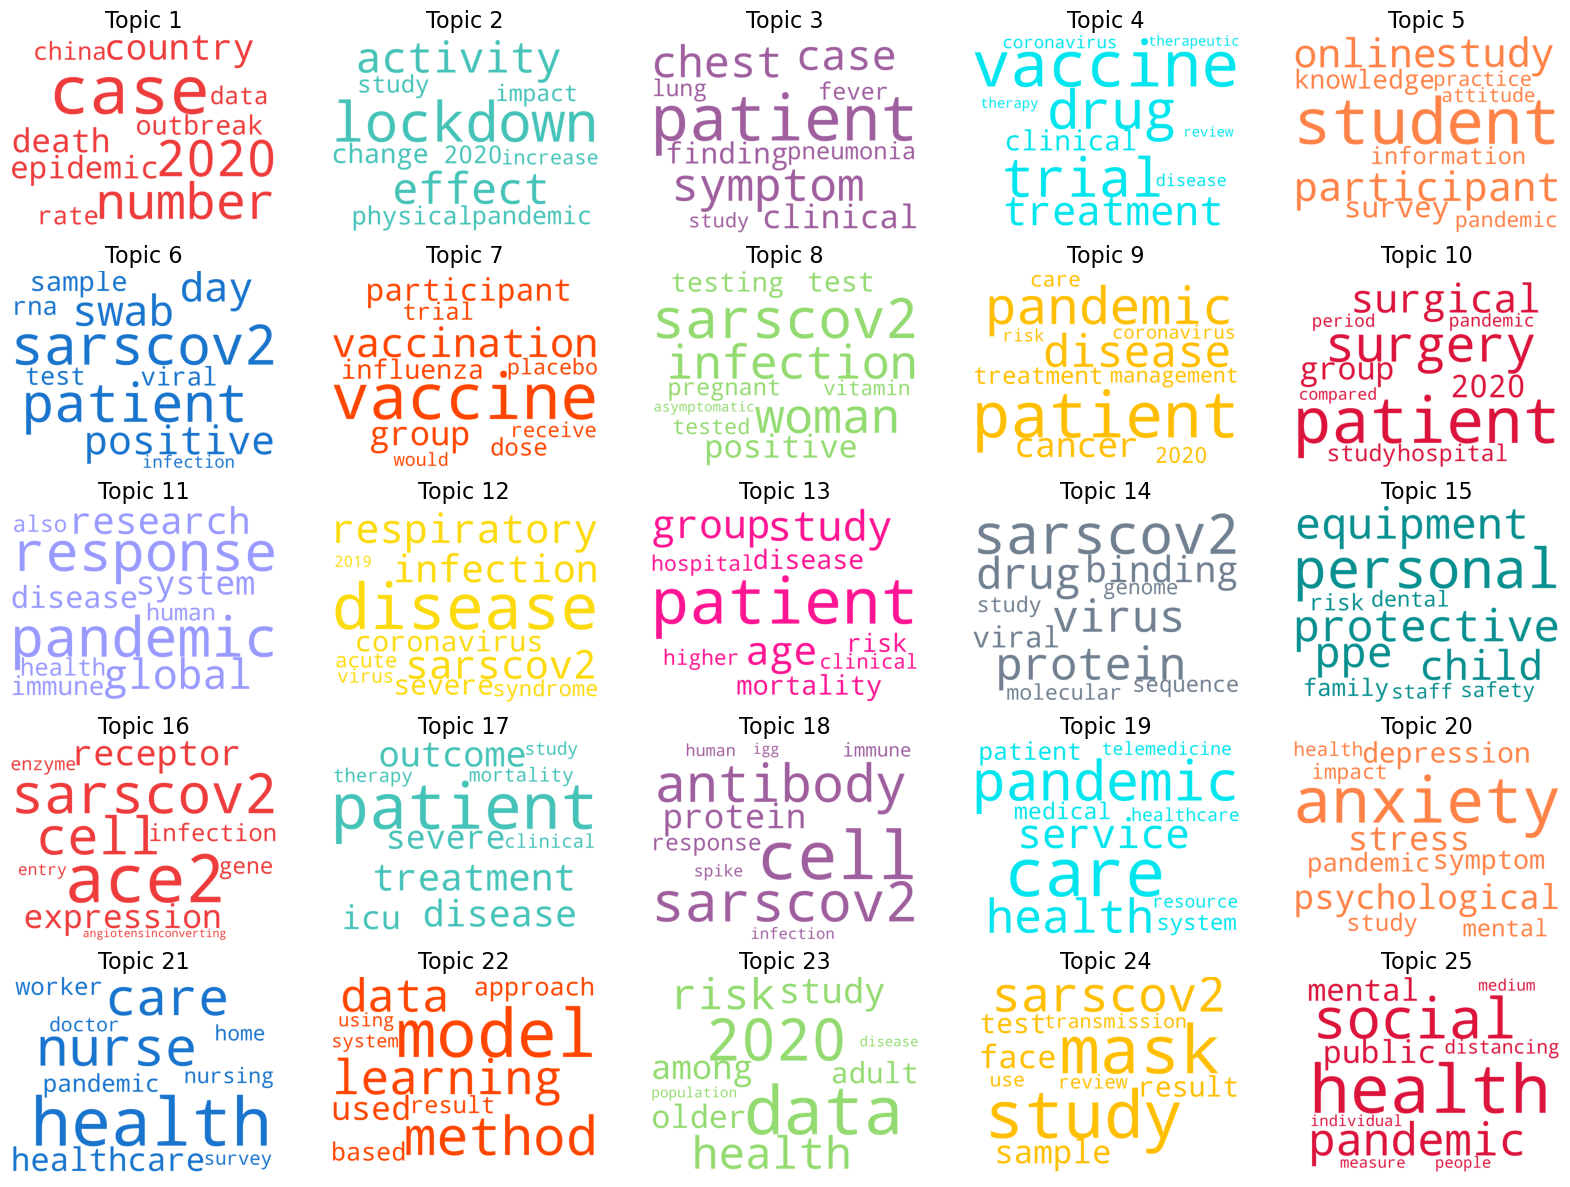

In [355]:
## Create WordCloud images

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a color map for your wordcloud - adjust the number of color codes if necessary to match the number of topics selected
color_codes = ['#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C',  
               '#999aff',  '#FDDA0D', '#ff1493', '#708090', '#088F8F',
               '#EE3B3B',  '#45C3B8', '#9F5F9F', '#00E5EE', '#FF8247', 
               '#1874CD',  '#FF4500', '#93DB70', '#FFBF00', '#DC143C']

# Build the WordCloud 
wc = WordCloud(background_color = 'white',
                  width = 2000,
                  height = 1500,
                  color_func = lambda *args, **kwargs: color_codes[i],
                  prefer_horizontal = 1)

# Extract topics from your LDA model to display in WordCloud

num_topics = 25
num_words = 10
rows = 5
cols = 5

# Create a figure and subplots that match the number of selected topics
fig, axes = plt.subplots(rows, cols, figsize=(20,15), sharex = True, sharey = True)
fig.subplots_adjust(hspace = .1)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)    

        # Createa a topic word, probability list and convrt it to a dictionary
        topic_word_prob_list = models[num_topics].show_topic(i, num_words)
        topic_word_dict = {t[0]:t[1] for t in topic_word_prob_list}

        # Display topic words in wordcloud
        wc.generate_from_frequencies(topic_word_dict, max_font_size = 500)
        plt.gca().imshow(wc)
        plt.gca().set_title('Topic ' + str(i+1), fontdict = dict(size = 16))
        plt.gca().axis('off')

        # Save the wordcloud image
#         if i+1 == 25:
#             plt.savefig('wc_25.png')


In [356]:
## Save the pyLDAvis and worcloud plots

# pickle.dump(vis, open('vis_30.pk', 'wb'))
# pickle.dump(fig, open('wc_30.pk', 'wb'))

# # To reload the saved results, use the below code

# vis = pickle.load(open('vis_30.pk', 'rb'))
# fig = pickle.load(open('wc_30.pk', 'rb'))


## Step 9: Identify dominant topic per document

Finally, we can identify a dominant topic for each document by selecting the topic with the highest probability in that document. Identifying dominant topics can help you classify documents into meaningful categories and analyze the distribution of topics over a collection of documents. Please remember that a document is comprised of multiple topics with varying degrees of probabilities; it is possible that several topics are similar in probabilities for a document, yet only one can be selected as a dominant topic. You should view the results with caution.

In [357]:
## Identify a dominant topic and its probability for each document and add it to the original df

num_topics = 25

def get_dominant_topics(lda_model, corpus, df):
        
    '''
    
    This fundction creates a dataframe of dominant topics and their probabilities for documents and 
    concatenate it with the document dataframe.
    
    Input:
    lda_model - LDA model tranied to generate topics from documents
    corpus - documents  
    df - dataframe of documents 
    
    
    Output:
    topics_df - dataframe that contains dominant topics and their probabilities with 
                corresponding document ids, journals, titles, and abstracts.
                
    '''

    # Create an empty df to store topics, probabilities, and keywords
    topic_df = pd.DataFrame(columns = ['dominant_topic', 'probability', 'topic_keywords'])
    topics_df = pd.DataFrame()

    # Get topics in each document and sort them
    for i, row_list in enumerate(models[num_topics][corpus]):
        row = row_list[0] if models[num_topics].per_word_topics else row_list            
        row = sorted(row, key = lambda x: (x[1]), reverse = True)
        
        # Get the dominant topic, probability, and topic keywords for each document
        for j, (topic_num, topic_prob) in enumerate(row):
            if j == 0:  # this is a dominant topic
                topic_word_prob_list = models[num_topics].show_topic(topic_num)
                topic_keywords = ', '.join([word for word, prob in topic_word_prob_list])
                topic_info = [str(int(topic_num +1)), round(topic_prob,2), topic_keywords]
                # Append the topic info list to the topic df
                topic_df.loc[len(topic_df)] = topic_info
                
            else:
                break
    
    # Subset the document df columns
    cols = ['pmid', 'journal', 'title', 'abstract']
    doc_df = df[cols]
    
    # Concatenate document df with topics df
    topics_df = pd.concat([topic_df, doc_df], axis = 1)
    
    return topics_df

In [358]:
## Create a dominant topic df and check topic assignments to documents

df_topics = get_dominant_topics(models[num_topics], bow_corpus, df)

# Check the first 10 papers
df_topics.head(10)

,dominant_topic,probability,topic_keywords,pmid,journal,title,abstract
0,19,0.27,"care, pandemic, health, service, patient, medical, system, telemedicine, healthcare, resource",33188602,International orthopaedics,The experience of contact tracing in Singapore in the control of COVID-19: highlighting the use ...,Containing the coronavirus disease 2019 (COVID-19) pandemic would require aggressive contact tra...
1,12,0.29,"disease, respiratory, sarscov2, infection, coronavirus, severe, syndrome, acute, virus, 2019",32910458,Journal of medical virology,Apoptosis and immunophenotyping of peripheral blood lymphocytes in Iranian COVID-19 patients: Cl...,"A novel member of human coronavirus, named severe acute respiratory syndrome coronavirus-2 (SARS..."
2,19,0.61,"care, pandemic, health, service, patient, medical, system, telemedicine, healthcare, resource",32514598,Intensive care medicine,Managing ICU surge during the COVID-19 crisis: rapid guidelines.,"Given the rapidly changing nature of COVID-19, clinicians and policy makers require urgent revie..."
3,24,0.46,"mask, study, sarscov2, sample, face, result, test, transmission, use, review",32665352,BMJ open,Effects of respiratory rehabilitation on patients with novel coronavirus (COVID-19) pneumonia in...,The recent viral pneumonia caused by the COVID-19 has gained the attention of the people all ove...
4,1,0.40,"case, 2020, number, country, death, epidemic, outbreak, rate, china, data",32335628,JNMA; journal of the Nepal Medical Association,Air Medical Evacuation of Nepalese Citizen During Epidemic of COVID-19 from Wuhan to Nepal.,"In December 2019, the world was disrupted by the news of a new strain of virus known as Novel Co..."
5,12,0.45,"disease, respiratory, sarscov2, infection, coronavirus, severe, syndrome, acute, virus, 2019",33914310,Ginekologia polska,COVID-19 during pregnancy one year on - what lessons did we learn?,It is now more than a year since the first case of Severe Acute Respiratory Syndrome Coronavirus...
6,10,0.24,"patient, surgery, surgical, group, 2020, hospital, study, pandemic, period, compared",32313713,International journal of nursing sciences,Optimization of the intravenous infusion workflow in the isolation ward for patients with corona...,This study aimed to evaluate the effect of optimization of the intravenous infusion workflow in ...
7,4,0.26,"vaccine, trial, drug, treatment, clinical, coronavirus, disease, therapeutic, review, therapy",33838086,Journal of osteopathic medicine,"United States internet searches for ""infertility"" following COVID-19 vaccine misinformation.","On December 1, 2020, Drs. Wolfgang Wodarg and Micheal Yeadon petitioned to withhold emergency us..."
8,9,0.65,"patient, pandemic, disease, cancer, treatment, 2020, management, care, coronavirus, risk",33559575,The journal of hand surgery Asian-Pacific volume,Precaution Measures for the Safety of the Personnel in the Surgical Wards during the COVID-19 Pa...,"Coronavirus disease-19 has affected million of people worldwide, constituting the biggest social..."
9,12,0.64,"disease, respiratory, sarscov2, infection, coronavirus, severe, syndrome, acute, virus, 2019",33173966,Molecular medicine reports,Hematological changes in patients with COVID‑19 (Review).,"In December 2019, an emergence of pneumonia was detected in patients infected with a novel coron..."


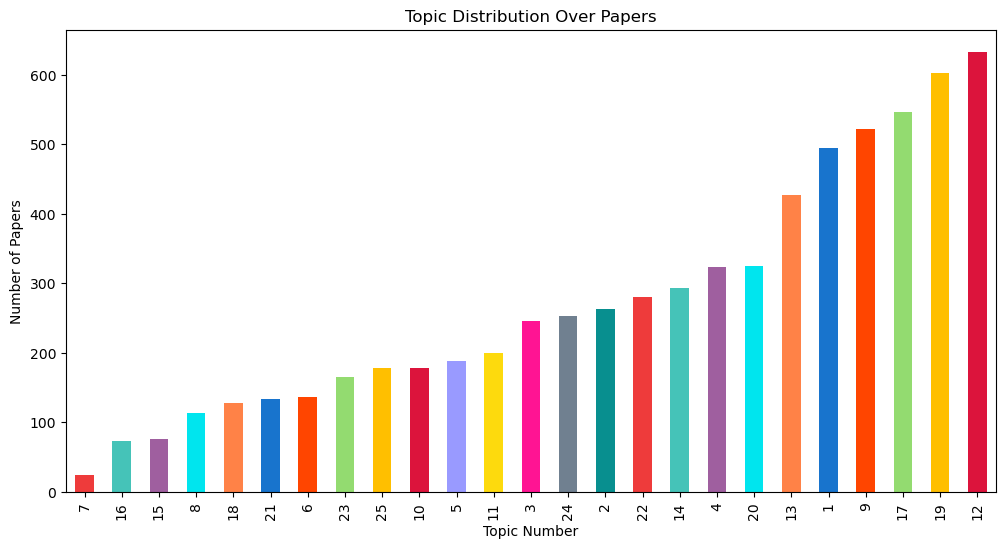

In [359]:
## Examine the distribution of topics over papers
# The color codes for dominant topics don't match those in wordcloud images becaues the topics are sorted by frequency

df_topics.groupby(df_topics['dominant_topic'])['pmid'].size().sort_values().\
    plot(kind = 'bar', figsize = (12,6), color = color_codes, \
         xlabel = 'Topic Number', ylabel = 'Number of Papers', \
         title = 'Topic Distribution Over Papers');


The graph indicates that the most prevalent topics in this dataset are related to COVID as a pandemic and respiratory disease. When you look at the topics assigned to each document, you sometimes find what appears to be mismatches. Because topic modeling is a purely mathmatical inference approach, it doesn't always coincides with human judgement. Additionally, as mentioned above, a document is a mixture of topics. You can check what other topics were extracted from those mismatched documents.

In [360]:
## Check out the papers submitted to the Vaccine journal and examine the assigned topics

df_topics[df_topics.journal == 'Vaccine'].head(20)

,dominant_topic,probability,topic_keywords,pmid,journal,title,abstract
88,4,0.37,"vaccine, trial, drug, treatment, clinical, coronavirus, disease, therapeutic, review, therapy",32747214,Vaccine,The Brighton Collaboration standardized template for collection of key information for benefit-r...,Inactivated viral vaccines have long been used in humans for diseases of global health threat an...
1375,23,0.43,"data, 2020, health, risk, study, among, older, adult, population, disease",33771392,Vaccine,"COVID-19 vaccine intentions in the United States, a social-ecological framework.",COVID-19 vaccine hesitancy is a major obstacle for pandemic mitigation. As vaccine hesitancy occ...
1918,4,0.41,"vaccine, trial, drug, treatment, clinical, coronavirus, disease, therapeutic, review, therapy",33341305,Vaccine,BCG vaccine: Worrying proposal for COVID-19.,Bacille Calmette-Gu rin (BCG) vaccine is proven to be effective in protecting against severe tub...
2371,22,0.36,"model, method, learning, data, used, approach, based, result, system, using",33744048,Vaccine,Assessment of SARS-CoV-2 specific CD4(+) and CD8 (+) T cell responses using MHC class I and II t...,The success of SARS-CoV-2 (CoV-2) vaccines is measured by their ability to mount immune memory r...
3113,4,0.24,"vaccine, trial, drug, treatment, clinical, coronavirus, disease, therapeutic, review, therapy",32684499,Vaccine,Planning for COVID-19 vaccines safety surveillance.,COVID-19 vaccines are the most important tool to stem the pandemic. They are being developed wit...
3703,19,0.27,"care, pandemic, health, service, patient, medical, system, telemedicine, healthcare, resource",32703743,Vaccine,A global agenda for older adult immunization in the COVID-19 era: A roadmap for action.,"Given our global interconnectedness, the COVID-19 pandemic highlights the urgency of building a ..."
4554,1,0.51,"case, 2020, number, country, death, epidemic, outbreak, rate, china, data",33771391,Vaccine,Projected COVID-19 epidemic in the United States in the context of the effectiveness of a potent...,Multiple candidates of COVID-19 vaccines have entered Phase III clinical trials in the United St...
6294,7,0.49,"vaccine, vaccination, group, participant, influenza, dose, trial, placebo, receive, would",33744049,Vaccine,The potential effects of deploying SARS-Cov-2 vaccines on cold storage capacity and immunization...,SARS-CoV-2 vaccines will be deployed to countries with limited immunization systems. We assessed...
6338,18,0.60,"cell, sarscov2, antibody, protein, response, immune, human, spike, infection, igg",33039209,Vaccine,Yeast-expressed SARS-CoV recombinant receptor-binding domain (RBD219-N1) formulated with aluminu...,We developed a severe acute respiratory syndrome (SARS) subunit recombinant protein vaccine cand...


In [361]:
## Check the random doc and its topics

num_topics = 25
test_doc_num = 2522

get_doc_topics(df, test_doc_num, models, num_topics, dictionary, stopword_list)


Abstract for the sample document:

 The World Health Organization characterizes novel coronavirus disease 2019 (COVID-19), which is caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2), as a pandemic. Here, we investigated the clinical, cytokine levels; T-cell proportion; and related gene expression occurring in patients with COVID-19 on admission and after initial treatment. Eleven patients diagnosed with COVID-19 with similar initial treatment regimens were enrolled in the hospital. Plasma cytokine, peripheral T cell proportions, and microfluidic quantitative polymerase chain reaction analyses for gene expression were conducted. Five patients with mild and 6 with severe disease were included. Cough and fever were the primary symptoms in the 11 COVID-19 cases. Older age, higher neutrophil count, and higher C-reactive protein levels were found in severe cases. IL-10 level significantly varied with disease progression and treatment. Decreased T-cell proportions were o

## Step 10 : Improve your models

After evaluating the preliminary results, see if you can improve your models. Possible approaches include:
* Use **different preprocessing steps** (e.g., filtering words for nouns, removing numbers/people's names)
* Customize the **stopwords list**
* Compute **[TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)** (Term Frequency and Inverse Docuement Frequency) on the corpus for word relevancy
* Tune **model hyperparameters**

Please note that there is no one-size-fits-all appraoach and that implementing the above strategies may not lead to better results. In fact, the results can be worse. You need to spend time learning your data and finding the best way to capture the meaningful topics for your data. Tune your models in the below cell. 

## Step 11: Evaluate your models and select the one that makes the most sense for your data

Evaluate your models using coherence scores and your judgement. Lots of work, data exploration, and trial and error is involved in devloping a good topic model for your data—it requires many iterations and repeated validation of your results. You can get topics from any datsets. The important question is "How are you going to validate the results?" We have provided multiple evaluation and validation steps in this notebook. Play with this notebook using your own dataset. Hope you have fun learning about topic modeling!